In [1]:
# Update PATH environment variable
import os
os.environ['PATH'] = '/opt/homebrew/bin:' + os.environ['PATH']

import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import cosmoplots

from scipy.stats import skew, kurtosis

from fppanalysis.running_moments import window_radius, run_norm_ds

from analysis_functions.constants import greenwald_fraction, shot_time_window
from analysis_functions.apd_functions import get_signal, get_time, get_rz, get_rz_full

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### At  Z = 0 cm

In [2]:
magnetic_connection_length = {
    
    1160616018: {
      0.89: 21.9,
      #0.8908: 16.1,
      0.891: 15.3,
      #0.8911: 15,
      0.892: 12.7,
      0.893: 11.1,
      0.894: 9.95,
      0.895: 9.18,
      0.896: 8.45,
      0.897: 7.94,
      0.898: 7.51, 
      0.899: 7.14,
      0.900: 6.81,
      0.901: 6.52,
      0.902: 6.27,
      0.903: 6.04,
      0.904: 5.83,
      0.905: 5.64,
      0.906: 5.47,
      0.907: 0.733,
      0.908: 0.665,
      0.909: 0.607,
      0.91: 0.121,
    },
    1110201016: {
      0.893: 11.5,
      0.894: 8.15, 
      0.895: 6.89,
      0.896: 6.08,
      0.897: 5.5,
      0.898: 5.06, 
      0.899: 4.74,
      0.900: 4.48,
      0.901: 4.26, 
      0.902: 4.06,
      0.903: 3.89,
      0.904: 3.73,
      0.905: 3.6, 
      0.906: 3.48, 
      0.907: 0.466,
      0.908: 0.414,
      0.909: 0.378,
      0.91: 0.062,
      0.911: 0.157, 
    },
    1110201011: {
      0.893: np.nan,
      0.894: np.nan, 
      0.895: 6.92,
      0.896: 5.67,
      0.897: 4.95,
      0.898: 4.44, 
      0.899: 4.06,
      0.900: 3.77,
      0.901: 3.55, 
      0.902: 3.37,
      0.903: 3.20,
      0.904: 3.06,
      0.905: 2.94, 
      0.906: 2.83, 
      0.907: 0.357,
      0.908: 0.324,
      0.909: 0.298,
      0.91: 0.0553,
      0.911: 0.129, 
    }
}

#### Z = -2.99 cm

In [35]:

magnetic_connection_length = {
    1160616018: {
      0.89: 14.5,
      0.891: 12.2,
      0.892: 10.6,
      0.893: 9.52,
      0.894: 8.72,
      0.895: 8.11,
      0.896: 7.61,
      0.897: 7.18,
      0.898: 6.81, 
      0.899: 6.49,
      0.900: 6.21,
      0.901: 5.96,
      0.902: 5.72,
      0.903: 5.53,
      0.904: 5.34,
      0.905: 5.17,
      0.906: 0.441, # (Contour intersects AB limiter)
      0.907: 0.374, # (Contour intersects AB limiter)
      0.908: 0.319, # (Contour intersects AB limiter)
      0.909: 0.12,  # (Contour intersects GH limiter)
      0.91: 0.00417,# (Contour intersects GH, AB, K limiter)
    },

    1110201016: {
      0.89: np.nan, # (Starting RZ inside the core)
      0.891: np.nan, # (Starting RZ inside the core)
      0.892: 9.7,
      0.893: 7.54,
      0.894: 6.46, 
      0.895: 5.74,
      0.896: 5.2,
      0.897: 4.8,
      0.898: 4.49, 
      0.899: 4.24,
      0.900: 4.03,
      0.901: 3.84, 
      0.902: 3.67,
      0.903: 3.53,
      0.904: 2.78,
      0.905: 3.27, 
      0.906: 0.275, # (Contour intersects AB limiter)
      0.907: 0.231, # (Contour intersects AB limiter)
      0.908: 0.197, # (Contour intersects AB limiter)
      0.909: 0.0708, # (Contour intersects GH limiter)
      0.91: 0.00255, # (Contour intersects GH, AB, K limiter)
    },

    1110201011: {
      0.89: np.nan, # (Starting RZ inside the core)
      0.891: np.nan, # (Starting RZ inside the core)
      0.892: np.nan, # (Starting RZ inside the core)
      0.893: 10.5,
      0.894: 6.44,
      0.895: 5.35,
      0.896: 4.7,
      0.897: 4.21,
      0.898: 3.85, 
      0.899: 3.59,
      0.900: 3.37,
      0.901: 3.19, 
      0.902: 3.04,
      0.903: 2.9,
      0.904: 3.06,
      0.905: 2.67, 
      0.906: 0.213, # (Contour intersects AB limiter)
      0.907: 0.182, # (Contour intersects AB limiter)
      0.908: 0.156, # (Contour intersects AB limiter)
      0.909: 0.0584,# (Contour intersects GH limiter)
      0.910: 0.00203,# (Contour intersects GH, AB, K limiter)
    }
}

In [36]:
major_R_by_shot = {}
connection_length_by_shot = {}

# Iterate over each shot's data
for shot_number, values in magnetic_connection_length.items():
    # Assign the list of major_R keys to the corresponding shot number
    #major_R_to_cm = 
    major_R_by_shot[shot_number] = list(values.keys())
    connection_length_by_shot[shot_number] = list(values.values())

In [37]:
shotlist = [1110201016, 1110201011, 1160616018]
f_GWs = [greenwald_fraction[shot] for shot in shotlist]
marker_list = ['^', 's', 'o']
color_list = ['#785EF0', '#DC267F','#FFB000']
label_name = ['EDA H', 'ELM-free H', 'Ohmic']

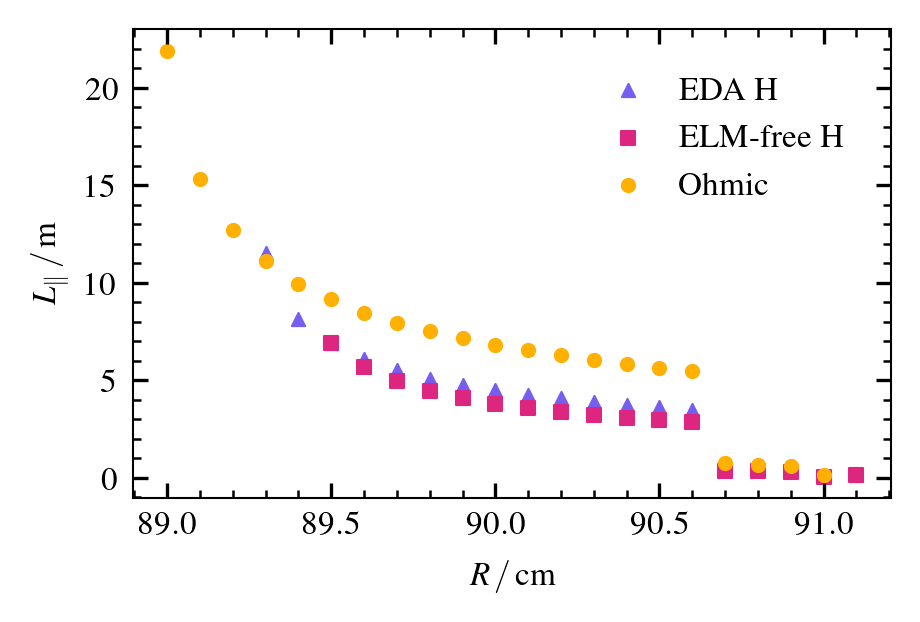

In [5]:
save = False

params = {}
cosmoplots.set_rcparams_dynamo(params, num_cols=1)
plt.style.use(["cosmoplots.default"])
plt.rcParams['text.latex.preamble'] =  r'\usepackage{amsmath}' r'\usepackage{times}' r'\usepackage{mathptmx}' r'\usepackage{amssymb}' r'\newcommand{\taup}{\ensuremath{\tau_\shortparallel}}' r'\newcommand{\wh}{\widehat}' r'\newcommand{\ave}[1]{{\left<#1\right>}}'
plt.rc('font',family='Times New Roman')

fig, ax = plt.subplots()

for idx, shot in enumerate(shotlist):
  major_R_by_shot_to_cm = [item * 100 for item in major_R_by_shot[shot]]
  ax.scatter(major_R_by_shot_to_cm, connection_length_by_shot[shot], color=color_list[idx], marker=marker_list[idx], s=10, label=label_name[idx])
ax.legend(borderaxespad=1, frameon=False)
ax.set_ylabel(r'$L_{\parallel}\,/\, \mathrm{m}$')
ax.set_xlabel(r'$R\,/\,\mathrm{cm}$')


if save == True:
    formats = ["pdf", "eps"]
    foldername = '/Users/ahe104/Box/time_delay_estimation/velocity_field/analysis/PSI/'
    for fmt in formats:
        filename = f'magnetic_connection_length.{fmt}'
        fig.savefig(foldername + filename, format=fmt)

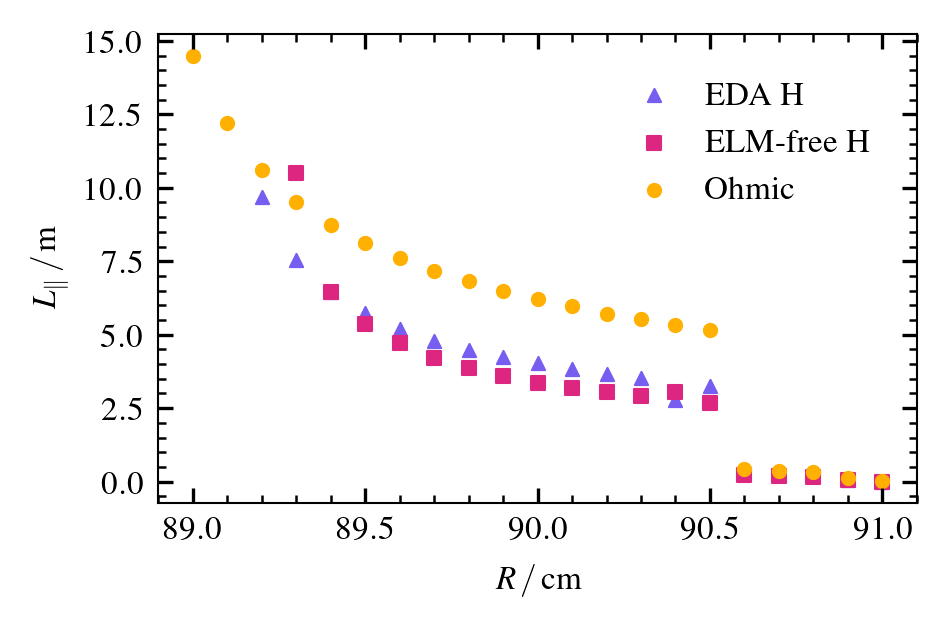

In [65]:
save = True
Z_pos = 0.299

params = {}
cosmoplots.set_rcparams_dynamo(params, num_cols=1)
plt.style.use(["cosmoplots.default"])
plt.rcParams['text.latex.preamble'] =  r'\usepackage{amsmath}' r'\usepackage{times}' r'\usepackage{mathptmx}' r'\usepackage{amssymb}' r'\newcommand{\taup}{\ensuremath{\tau_\shortparallel}}' r'\newcommand{\wh}{\widehat}' r'\newcommand{\ave}[1]{{\left<#1\right>}}'
plt.rc('font',family='Times New Roman')

fig, ax = plt.subplots()

for idx, shot in enumerate(shotlist):
  major_R_by_shot_to_cm = [item * 100 for item in major_R_by_shot[shot]]
  ax.scatter(major_R_by_shot_to_cm, connection_length_by_shot[shot], color=color_list[idx], marker=marker_list[idx], s=10, label=label_name[idx])
ax.legend(borderaxespad=1, frameon=False)
ax.set_ylabel(r'$L_{\parallel}\,/\, \mathrm{m}$')
ax.set_xlabel(r'$R\,/\,\mathrm{cm}$')

if save == True:
    formats = ["pdf", "eps"]
    foldername = '/Users/ahe104/Box/time_delay_estimation/velocity_field/analysis/PSI/'
    for fmt in formats:
        filename = f'magnetic_connection_length_{Z_pos}.{fmt}'
        fig.savefig(foldername + filename, format=fmt)

In [6]:
path_LCFS = Path('/Users/ahe104/box/mfe_data/LCFS_limiter')

R_LCFS_dict = {}
Z_LCFS_dict = {}
R_LCFS_mean_dict = {}

for shot in shotlist:
    LCFS_limiter_data = np.load(
        str(path_LCFS)
        + "/"
        + f"LCFS_limiter_{shot}.npz"
    )

    R_limiter = LCFS_limiter_data['R_limiter']
    Z_limiter = LCFS_limiter_data['Z_limiter']
    R_LCFS = LCFS_limiter_data['R_LCFS']
    Z_LCFS = LCFS_limiter_data['Z_LCFS']
    R_LCFS_mean = LCFS_limiter_data['R_LCFS_mean']
    # R_LCFS_min = LCFS_limiter_data['R_LCFS_min']
    # R_LCFS_max = LCFS_limiter_data['R_LCFS_max']

    R_LCFS_dict[shot] = R_LCFS
    Z_LCFS_dict[shot] = Z_LCFS
    R_LCFS_mean_dict[shot] = R_LCFS_mean

In [42]:
Z_0_idx = {}

# Find index where Z = -3 cm (closest to -2.99 cm)
for shot in shotlist: 
    Z_0_idx[shot] = np.where(Z_LCFS_dict[shot] == -3)[0][0]

Z_0_idx = 55

In [ ]:
# Make average of L_parallel only inside SOL
R_LCFS_mean_list = []
for shot in shotlist: 
    R_LCFS_mean_list.append(R_LCFS_mean_dict[shot][Z_0_idx][0])

In [64]:
for shot in shotlist:
    print(major_R_by_shot_to_cm)
    print(connection_length_by_shot[shot])
    if shot == 1160616018:
        L_parallel_idx = 0
    else:
        L_parallel_idx = np.where(major_R_by_shot_to_cm == np.round(R_LCFS_mean_dict[shot][Z_0_idx][0], 1))[0][0]
    print(np.nanmean(connection_length_by_shot[shot][L_parallel_idx:15]))

[89.0, 89.1, 89.2, 89.3, 89.4, 89.5, 89.60000000000001, 89.7, 89.8, 89.9, 90.0, 90.10000000000001, 90.2, 90.3, 90.4, 90.5, 90.60000000000001, 90.7, 90.8, 90.9, 91.0]
[nan, nan, 9.7, 7.54, 6.46, 5.74, 5.2, 4.8, 4.49, 4.24, 4.03, 3.84, 3.67, 3.53, 2.78, 3.27, 0.275, 0.231, 0.197, 0.0708, 0.00255]
4.693333333333334
[89.0, 89.1, 89.2, 89.3, 89.4, 89.5, 89.60000000000001, 89.7, 89.8, 89.9, 90.0, 90.10000000000001, 90.2, 90.3, 90.4, 90.5, 90.60000000000001, 90.7, 90.8, 90.9, 91.0]
[nan, nan, nan, 10.5, 6.44, 5.35, 4.7, 4.21, 3.85, 3.59, 3.37, 3.19, 3.04, 2.9, 3.06, 2.67, 0.213, 0.182, 0.156, 0.0584, 0.00203]
4.516666666666667
[89.0, 89.1, 89.2, 89.3, 89.4, 89.5, 89.60000000000001, 89.7, 89.8, 89.9, 90.0, 90.10000000000001, 90.2, 90.3, 90.4, 90.5, 90.60000000000001, 90.7, 90.8, 90.9, 91.0]
[14.5, 12.2, 10.6, 9.52, 8.72, 8.11, 7.61, 7.18, 6.81, 6.49, 6.21, 5.96, 5.72, 5.53, 5.34, 5.17, 0.441, 0.374, 0.319, 0.12, 0.00417]
8.033333333333333


In [58]:
print(connection_length_by_shot[shot][15])
print(major_R_by_shot_to_cm[15])

5.17
90.5


In [47]:
major_R_by_shot_to_cm = [item * 100 for item in major_R_by_shot[shot]]
print(major_R_by_shot_to_cm)

[89.0, 89.1, 89.2, 89.3, 89.4, 89.5, 89.60000000000001, 89.7, 89.8, 89.9, 90.0, 90.10000000000001, 90.2, 90.3, 90.4, 90.5, 90.60000000000001, 90.7, 90.8, 90.9, 91.0]


In [56]:
L_parallel_idx = np.where(major_R_by_shot_to_cm == np.round(R_LCFS_mean_dict[1110201016][Z_0_idx][0], 1))[0][0]
print(L_parallel_idx[0][0])

3


In [45]:
print(R_LCFS_mean_dict[1110201016][Z_0_idx][0])
print(R_LCFS_mean_dict[1110201011][Z_0_idx][0])
print(R_LCFS_mean_dict[1160616018][Z_0_idx][0])
print(R_limiter[Z_0_idx])

89.28241265306775
89.2006591135191
88.75994061698682
90.90531676349711


### Find SOL gap 

In [66]:
SOL_gap = {}

for shot in shotlist:
    SOL_gap[shot] = R_limiter[Z_0_idx] - R_LCFS_mean_dict[shot][Z_0_idx][0]

print(SOL_gap)

{1110201016: 1.62290411042936, 1110201011: 1.7046576499780173, 1160616018: 2.145376146510287}


In [67]:
R_limiter[Z_0_idx]

90.90531676349711

In [31]:
print(SOL_gap)

{1110201016: 1.6511039452603313, 1110201011: 1.7375029044201824, 1160616018: 2.1434856371930096}


#### Calculate average magnetic connection length inside SOL

In [34]:
print(connection_length_by_shot[shot])
major_R_by_shot_to_cm = [item * 100 for item in major_R_by_shot[shot]]
print(major_R_by_shot_to_cm)

[21.9, 15.3, 12.7, 11.1, 9.95, 9.18, 8.45, 7.94, 7.51, 7.14, 6.81, 6.52, 6.27, 6.04, 5.83, 5.64, 5.47, 0.733, 0.665, 0.607, 0.121]
[89.0, 89.1, 89.2, 89.3, 89.4, 89.5, 89.60000000000001, 89.7, 89.8, 89.9, 90.0, 90.10000000000001, 90.2, 90.3, 90.4, 90.5, 90.60000000000001, 90.7, 90.8, 90.9, 91.0]
